# Number of Covid-19 Deaths in Nursing Homes across US during 1/1/2020 - 7/16/2020



In this script, we will display number of total deaths and total Covid-19 deaths in Nursing homes across US during 1/1/2020 - 7/16/2020. At the end, we will picturize first ten states with high Covid-19 deaths and first 10 states with less Covid-19 deaths.

In [32]:
# Dependencies and Setup
import gmaps
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import requests
from config import api_key
# from ipywidgets.embed import embed_minimal_html
import gmaps
# Google API Key
# from config import gkey
# Configure gmaps
gmaps.configure(api_key=api_key)
import import_ipynb
from statewise import getProvidersBestRatedinPA
from statewise import getCleanProviderInfo

In [33]:
#Read the input data-1/1/2020- 7/16/2020
read_covid_19=pd.read_csv("../Resources/COVID-19_Nursing_Home_Dataset.csv")
covid_19=read_covid_19[["Provider Name","Provider State","Residents Total All Deaths","Residents Total COVID-19 Deaths","County","Geolocation"]]
covid_19.head()

,Provider Name,Provider State,Residents Total All Deaths,Residents Total COVID-19 Deaths,County,Geolocation
0,LITTLE SISTERS OF THE POOR,PA,3.0,0.0,Allegheny,POINT (-80.03391 40.488114)
1,COUNTRY CLUB RET CENTER I I I,OH,3.0,0.0,Ashtabula,POINT (-80.789137 41.88285)
2,CROSS TIMBERS NURSING AND REHABILIATION,OK,1.0,0.0,Oklahoma,POINT (-97.417545 35.452283)
3,MARION POINTE,OH,1.0,0.0,Marion,POINT (-83.135435 40.579072)
4,BLOOMSBURG CARE CENTER AND REHABILITATION CENTER,PA,NaN,NaN,Columbia,POINT (-76.454668 41.005753)


In [34]:
# Rename the ProvidName and State
rename_covid_19=covid_19.rename(columns={"Provider Name":"Prov Name","Provider State":"STATE"})
rename_covid_19
# Drop the Data based on Residents total Covid-19 Deaths
rename_covid_19.drop(rename_covid_19[(rename_covid_19["Residents Total All Deaths"]==0) | (rename_covid_19["Residents Total All Deaths"].isnull())].index, inplace=True)
clear_covid_19=rename_covid_19.groupby("STATE").sum()

In [35]:
clear_covid_19["Percentage"]=round((clear_covid_19["Residents Total COVID-19 Deaths"]/clear_covid_19["Residents Total All Deaths"])*100,3)
clear_covid_19.head()

,Residents Total All Deaths,Residents Total COVID-19 Deaths,Percentage
STATE,,,
AK,130.0,0.0,0.000
AL,10892.0,2138.0,19.629
AR,6748.0,538.0,7.973
AZ,6124.0,1319.0,21.538
CA,46063.0,12709.0,27.590


In [36]:
# Sort it and get 10 highest Covid_19 Death rate
Covid_19_death_sorted=clear_covid_19.sort_values(by='Residents Total COVID-19 Deaths', ascending=False)
# Worst 10 states across US based on the COVID-19 Deaths 
top_ten=Covid_19_death_sorted.head(10).reset_index()
# Best 10 states across US based on the COVID-19 Deaths 
last_ten=Covid_19_death_sorted.tail(10).reset_index()
top_ten

,STATE,Residents Total All Deaths,Residents Total COVID-19 Deaths,Percentage
0,NY,57512.0,27288.0,47.447
1,NJ,37366.0,23223.0,62.150
2,MA,35459.0,21546.0,60.763
3,PA,60969.0,19570.0,32.098
4,IL,36484.0,14631.0,40.103
5,CA,46063.0,12709.0,27.590
6,CT,22188.0,11497.0,51.816
7,MI,28994.0,8695.0,29.989
8,OH,31373.0,7226.0,23.033
9,MD,16203.0,6586.0,40.647


In [37]:
# Finding Mean of total deaths and Total Covid-19 deaths
mean_covid_19=round(clear_covid_19["Residents Total COVID-19 Deaths"].mean(),3)
print(f"The mean of Residents Total COVID-19 Deaths is : {mean_covid_19}")
mean_total_deaths=round(clear_covid_19["Residents Total All Deaths"].mean(),3)
print(f"The mean of Residents Total All Deaths(COVID-19 included) is : {mean_total_deaths}")

The mean of Residents Total COVID-19 Deaths is : 4276.882
The mean of Residents Total All Deaths(COVID-19 included) is : 13293.294


In [38]:
def covid_19_bar_chart1_toptenstates_across_US():
    # Graph Covid_19_Total Number of Covid-19 Deaths in Worst Top Ten States across US
    top_ten.plot(kind="bar",x="STATE", y=["Residents Total All Deaths","Residents Total COVID-19 Deaths"],figsize=(20,10),title='Ten States with High Covid-19 Deaths across US')
    plt.grid(True)
    plt.xlabel('STATE',size=20)
    plt.title('Ten States with High Covid-19 Deaths across US',size=20)
    plt.style.use('seaborn')
    ax = plt.gca()
    ax.tick_params(axis = 'x', which = 'major', labelsize = 20,labelrotation =75)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 15,labelrotation =60)
    plt.tight_layout()
    plt.show()
    plt.rcdefaults()

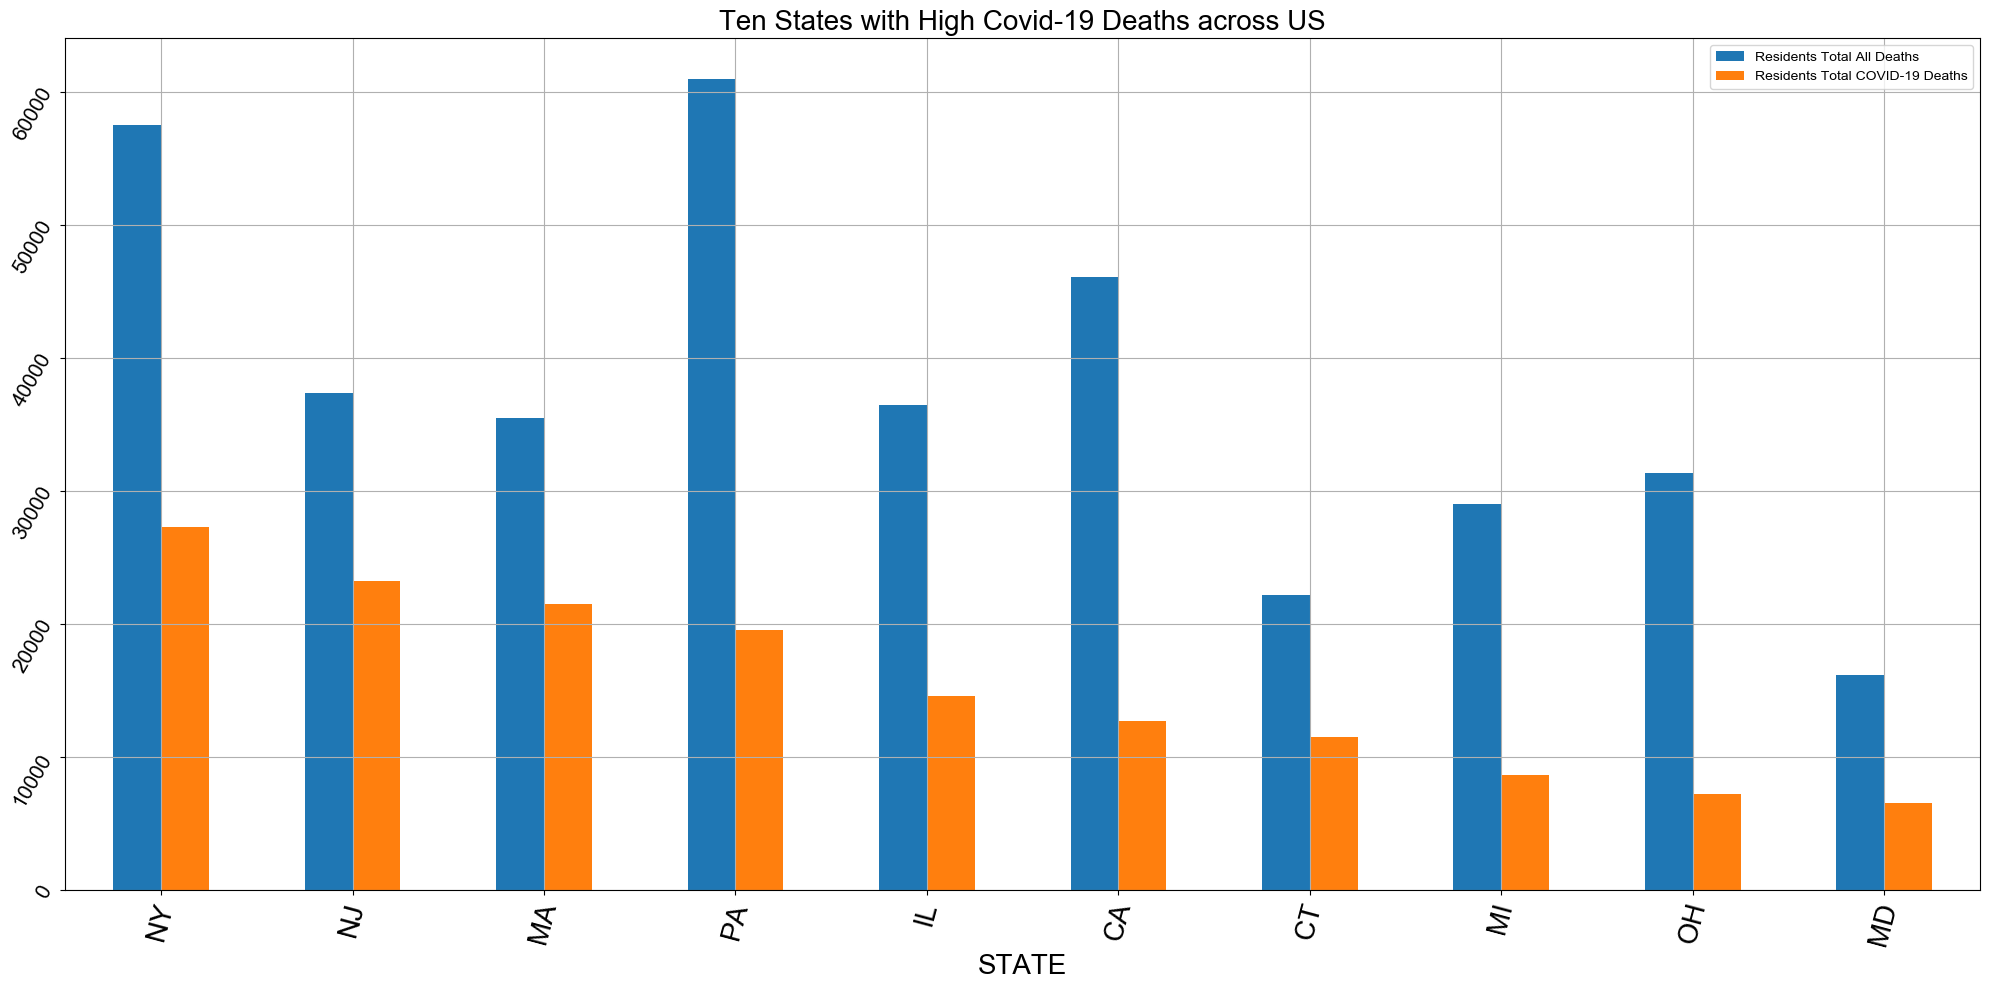

In [39]:
bar1=covid_19_bar_chart1_toptenstates_across_US()
bar1

In [40]:
plt.rcdefaults()

In [41]:
def covid_19_bar_chart2_lasttenstates_across_US():
    # def covid_19_Total Number of Covid-19 Deaths in Best Top Ten States across US
    last_ten.plot(kind="bar",x="STATE", y=["Residents Total All Deaths","Residents Total COVID-19 Deaths"],figsize=(20,10),title='Ten States with Less Covid-19 Deaths')
    plt.grid(True)
    plt.xlabel('STATE',size=20)
    plt.title('Ten States with Less Covid-19 Deaths',size=20)
    ax = plt.gca()
    ax.tick_params(axis = 'x', which = 'major', labelsize = 20,labelrotation =75)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 15,labelrotation =60)
    plt.tight_layout()
    plt.show()

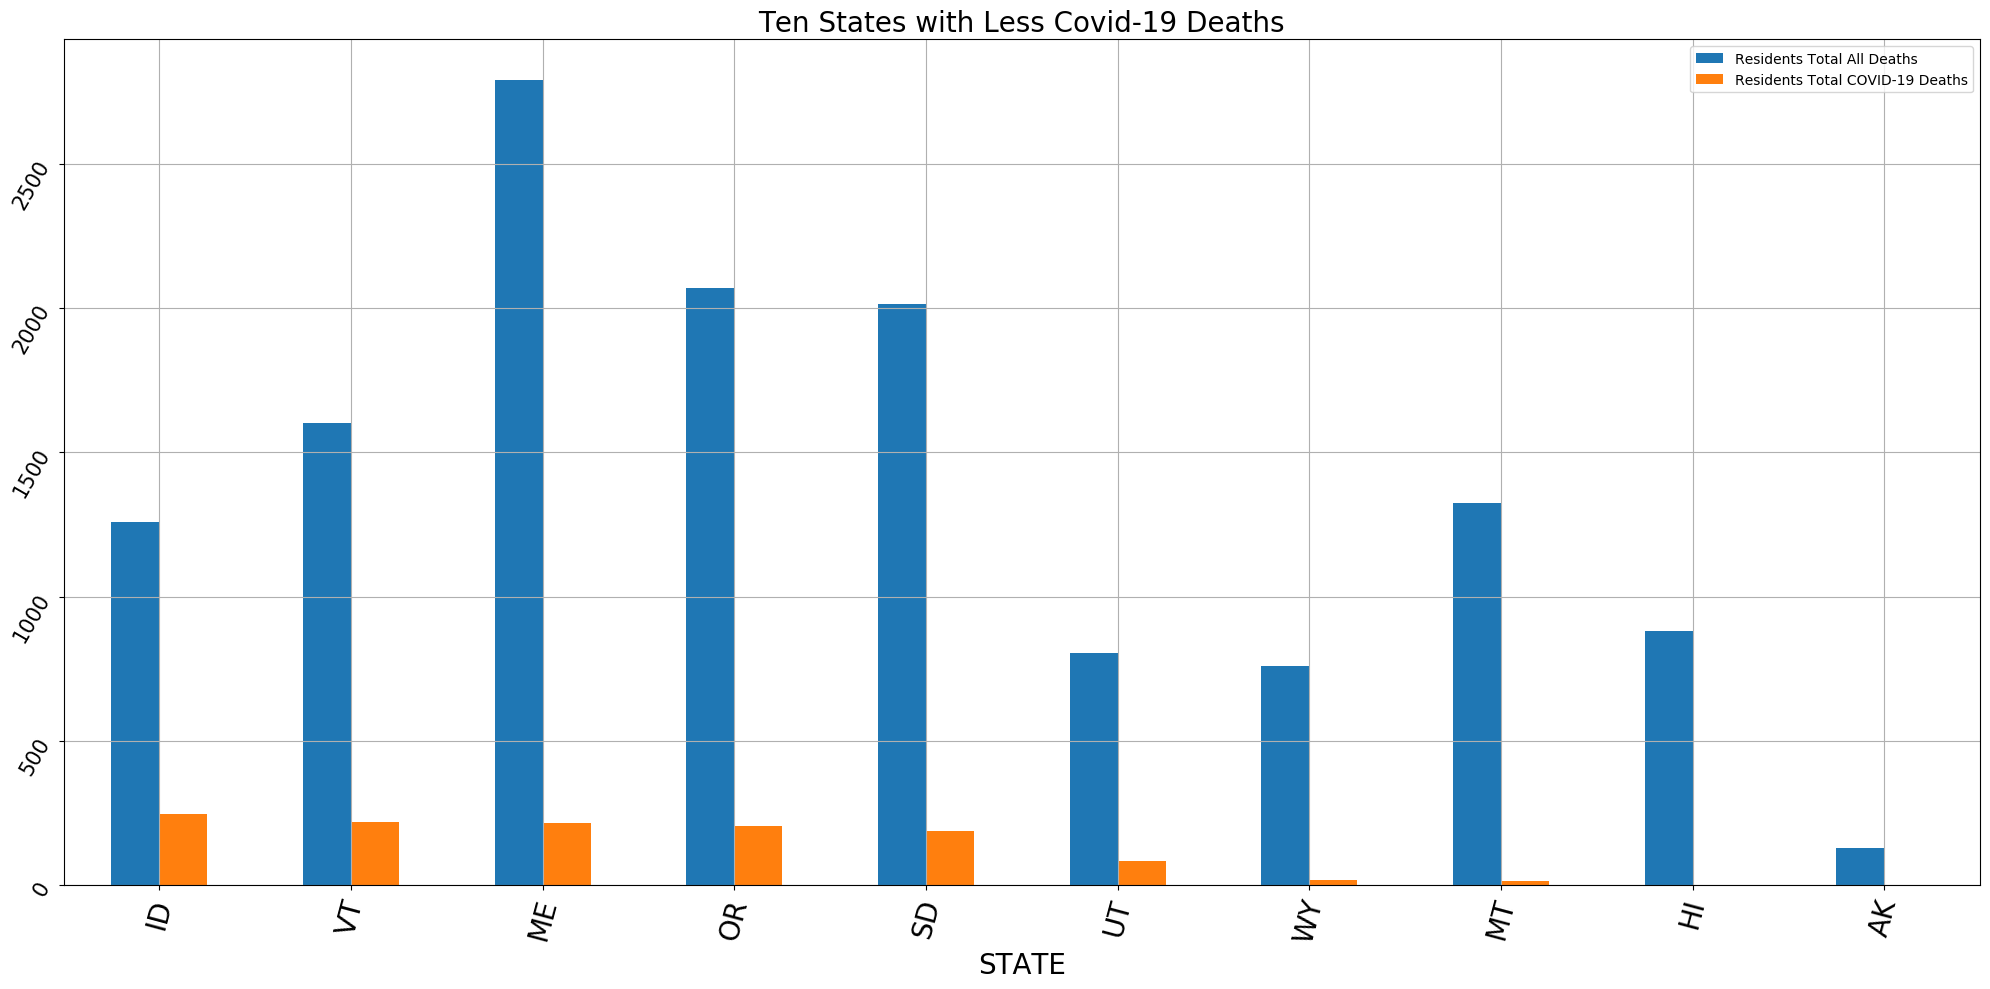

In [42]:
bar2=covid_19_bar_chart2_lasttenstates_across_US()
bar2

# PENN STATE DEATH COUNT &  COVID-19 DEATH COUNT during 1/1/2020- 7/16/2020

In this script, we will analyze and compare Total Covid-19 Deaths in Nursing Homes in PA based on its ratings to Overall Death Count. 

In [43]:
# def getcovid_19acrossPA():
#     # Generate a scatter plot of Number of Residents Total Deaths versus Number of Total Covid-19 Deaths in PA
#     Covid_19_PA=rename_covid_19.loc[rename_covid_19["STATE"]=="PA"]
#     # drop_Covid_19=Covid_19_PA.dropna(how="any")
#     Covid_19_PA
#     # Find number of Covid-19 Deaths in PA based on County
#     groupby_PA=Covid_19_PA.groupby(["County","STATE","Prov Name"]).sum().reset_index()
#     groupby_PA

In [44]:
# Generate a scatter plot of Number of Residents Total Deaths versus Number of Total Covid-19 Deaths in PA
Covid_19_PA=rename_covid_19.loc[rename_covid_19["STATE"]=="PA"]
# drop_Covid_19=Covid_19_PA.dropna(how="any")
Covid_19_PA

,Prov Name,STATE,Residents Total All Deaths,Residents Total COVID-19 Deaths,County,Geolocation
0,LITTLE SISTERS OF THE POOR,PA,3.0,0.0,Allegheny,POINT (-80.03391 40.488114)
9,PINE RUN HEALTH CENTER,PA,32.0,8.0,Bucks,POINT (-75.17485 40.3183)
17,"LUTHERAN HOME AT TOPTON, THE",PA,37.0,13.0,Berks,NaN
18,FAIRVIEW MANOR,PA,13.0,0.0,Erie,POINT (-80.22834200000001 42.069448)
19,FAIRVIEW NURSING AND REHABILITATION CENTER,PA,9.0,4.0,Philadelphia,POINT (-75.209822 40.084163)
...,...,...,...,...,...,...
85506,ROUSE WARREN COUNTY HOME,PA,10.0,0.0,Warren,POINT (-79.301824 41.844239)
85516,ST JOHN NEUMANN CTR FOR REHAB & HEALTHCARE,PA,59.0,38.0,Philadelphia,POINT (-75.01259 40.097493)
85521,FAIRMOUNT HOMES,PA,1.0,0.0,Lancaster,POINT (-76.149933 40.131981)
85523,WESLEY ENHANCED LIVING AT STAPELEY,PA,6.0,4.0,Philadelphia,POINT (-75.185288 40.039629)


In [45]:
# Find number of Covid-19 Deaths in PA based on County
groupby_PA=Covid_19_PA.groupby(["County","STATE","Prov Name"]).sum().reset_index()
groupby_PA.head()

,County,STATE,Prov Name,Residents Total All Deaths,Residents Total COVID-19 Deaths
0,Adams,PA,"CROSS KEYS VILLAGE-BRETHREN HOME COMMUNITY, THE",47.0,0.0
1,Adams,PA,"GARDENS AT GETTYSBURG, THE",18.0,0.0
2,Adams,PA,GETTYSBURG CENTER,59.0,0.0
3,Adams,PA,SPIRITRUST LUTHERAN THE VILLAGE AT GETTYSBURG,17.0,0.0
4,Adams,PA,SPIRITRUST LUTHERAN THE VILLAGE AT LUTHER RIDGE,12.0,0.0


In [46]:
best_rated_PA=getProvidersBestRatedinPA()
grouped_best_pa=best_rated_PA.groupby(["County","Prov Name","Overall Rating"])
clear_best_pa=grouped_best_pa.count().reset_index()
clear_best_pa.head()

,County,Prov Name,Overall Rating
0,Adams,SPIRITRUST LUTHERAN THE VILLAGE AT GETTYSBURG,5.0
1,Allegheny,BAPTIST HOMES OF WESTERN PENNSYLVANIA,4.0
2,Allegheny,CARING HEIGHTS COMMUNITY CARE & REHAB CTR,4.0
3,Allegheny,CHARLES M. MORRIS NURSING AND,4.0
4,Allegheny,CONCORDIA AT REBECCA RESIDENCE,4.0


In [47]:
# Merge with Best Rated PA Counties 1/1/2020-7/16/2020
covid_19_PA=pd.merge(groupby_PA,clear_best_pa, on=["County","Prov Name"], how="inner")
sort_Covid_19_PA=covid_19_PA.sort_values('Residents Total COVID-19 Deaths',ascending=False).reset_index(drop=True)
sort_Covid_19_PA.head()

,County,STATE,Prov Name,Residents Total All Deaths,Residents Total COVID-19 Deaths,Overall Rating
0,Delaware,PA,FAIR ACRES GERIATRIC CENTER,1009.0,446.0,4.0
1,Lehigh,PA,CEDARBROOK SENIOR CARE AND REHABILITATION,491.0,443.0,4.0
2,Bucks,PA,NESHAMINY MANOR HOME,593.0,289.0,5.0
3,Delaware,PA,ROSEWOOD GARDENS REHABILITATION AND NURSING CE...,624.0,229.0,4.0
4,Lancaster,PA,LUTHER ACRES MANOR,287.0,201.0,5.0


In [48]:
# Show the counties in PA which doesn't have any COVID-19 deaths
no_covid_19=sort_Covid_19_PA.loc[sort_Covid_19_PA["Residents Total COVID-19 Deaths"]==0]
no_covid_19.groupby(["County","STATE","Overall Rating"]).sum()

Residents Total All Deaths  \
County       STATE Overall Rating                               
Adams        PA    5.0                                   17.0   
Allegheny    PA    4.0                                 1266.0   
                   5.0                                  472.0   
Armstrong    PA    5.0                                   13.0   
Beaver       PA    5.0                                  245.0   
Berks        PA    4.0                                    5.0   
Blair        PA    4.0                                   41.0   
Bradford     PA    4.0                                    5.0   
Bucks        PA    4.0                                   66.0   
                   5.0                                  368.0   
Butler       PA    4.0                                  241.0   
                   5.0                                   29.0   
Centre       PA    4.0                                   38.0   
Chester      PA    4.0                                   45.0   
                   5.0                                  260.0   
Clarion      PA    4.0                                    4.0   
Clinton      PA    4.0                                   16.0   
Columbia     PA    4.0                                   30.0   
Crawford     PA    4.0                                   51.0   
                   5.0                                   24.0   
Cumberland   PA    4.0                                  361.0   
                   5.0                                  215.0   
Dauphin      PA    5.0                                  140.0   
Elk          PA    4.0                                   83.0   
Erie         PA    4.0                                  143.0   
                   5.0                                  719.0   
Fayette      PA    4.0                                   99.0   
Franklin     PA    4.0                                   19.0   
Lancaster    PA    4.0                                   21.0   
                   5.0                                  754.0   
Lawrence     PA    4.0                                  149.0   
                   5.0                                   37.0   
Lebanon      PA    5.0                                  173.0   
Lehigh       PA    4.0                                   91.0   
                   5.0                                   66.0   
Luzerne      PA    5.0                                   33.0   
Lycoming     PA    4.0                                   90.0   
Mercer       PA    4.0                                   35.0   
                   5.0                                   72.0   
Mifflin      PA    4.0                                   21.0   
Montgomery   PA    4.0                                   25.0   
                   5.0                                  228.0   
Northampton  PA    5.0                                   29.0   
Perry        PA    4.0                                   38.0   
Schuylkill   PA    4.0                                  129.0   
                   5.0                                  247.0   
Sullivan     PA    4.0                                   18.0   
Tioga        PA    4.0                                    7.0   
Venango      PA    4.0                                   35.0   
                   5.0                                  102.0   
Warren       PA    4.0                                  263.0   
Washington   PA    4.0                                   12.0   
                   5.0                                  241.0   
Westmoreland PA    4.0                                   90.0   
York         PA    4.0                                   62.0   
                   5.0                                   59.0   

                                   Residents Total COVID-19 Deaths  
County       STATE Overall Rating                                   
Adams        PA    5.0                                         0.0  
Allegheny    PA    4.0                                   

In [49]:
# Get only Counties in which there are people died based on Covid_19
counties_PA_Covid_19=sort_Covid_19_PA.loc[sort_Covid_19_PA["Residents Total COVID-19 Deaths"]>0]
# Finding the total Deaths and Covid-19 Deaths in the counties of PA based on ratings(4 & 5) 
best_rated_covid_19=counties_PA_Covid_19.groupby(["County","STATE","Overall Rating"]).sum()
best_rated_clear_df=best_rated_covid_19.sort_values("Residents Total COVID-19 Deaths", ascending=False)
best_rated_clear_df

,,,Residents Total All Deaths,Residents Total COVID-19 Deaths
County,STATE,Overall Rating,,
Delaware,PA,4.0,2486.0,1228.0
Lehigh,PA,4.0,816.0,699.0
Montgomery,PA,5.0,1538.0,692.0
Lancaster,PA,5.0,1445.0,688.0
Bucks,PA,5.0,1762.0,680.0
Berks,PA,5.0,1266.0,564.0
Delaware,PA,5.0,777.0,354.0
Northampton,PA,4.0,423.0,284.0
Lehigh,PA,5.0,468.0,255.0


In [50]:
best_clear_rated_df=best_rated_clear_df.groupby(["County","STATE"]).sum()
sorted_best_rated=best_clear_rated_df.sort_values('Residents Total COVID-19 Deaths',ascending=False)
sorted_best_rated.to_csv("../Resources/best_rated_pa.csv")
#Import counties from pacounty csv
Pa_best_rated_counties=pd.read_csv("../Resources/best_rated_pa.csv")
Pa_best_rated_counties

,County,STATE,Residents Total All Deaths,Residents Total COVID-19 Deaths
0,Delaware,PA,3263.0,1582.0
1,Lehigh,PA,1284.0,954.0
2,Bucks,PA,2347.0,924.0
3,Lancaster,PA,1652.0,828.0
4,Montgomery,PA,1816.0,809.0
5,Berks,PA,1372.0,665.0
6,Northampton,PA,946.0,517.0
7,Philadelphia,PA,790.0,378.0
8,Lackawanna,PA,519.0,251.0
9,Chester,PA,606.0,249.0


In [51]:
# Add columns for lat, lng
Pa_best_rated_counties["Lat"]= " "
Pa_best_rated_counties["Lng"]=" "
Pa_best_rated_counties

,County,STATE,Residents Total All Deaths,Residents Total COVID-19 Deaths,Lat,Lng
0,Delaware,PA,3263.0,1582.0,,
1,Lehigh,PA,1284.0,954.0,,
2,Bucks,PA,2347.0,924.0,,
3,Lancaster,PA,1652.0,828.0,,
4,Montgomery,PA,1816.0,809.0,,
5,Berks,PA,1372.0,665.0,,
6,Northampton,PA,946.0,517.0,,
7,Philadelphia,PA,790.0,378.0,,
8,Lackawanna,PA,519.0,251.0,,
9,Chester,PA,606.0,249.0,,


In [52]:
# create a params dict that will be updated with new county each iteration
params = {"key": api_key}

# Loop through the Pa_counties and run a lat/long search for each county
for index, row in Pa_best_rated_counties.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    County = row['County']
    STATE = row['STATE']


    # update address key value
    params['address'] = f"{County},{STATE}"

    # make request
    County_lat_lng = requests.get(base_url, params=params)


    # convert to json
    County_lat_lng = County_lat_lng.json()

    Pa_best_rated_counties.loc[index, "Lat"] = County_lat_lng["results"][0]["geometry"]["location"]["lat"]
    Pa_best_rated_counties.loc[index, "Lng"] = County_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
Pa_best_rated_counties


,County,STATE,Residents Total All Deaths,Residents Total COVID-19 Deaths,Lat,Lng
0,Delaware,PA,3263.0,1582.0,39.9078,-75.3879
1,Lehigh,PA,1284.0,954.0,40.652,-75.5742
2,Bucks,PA,2347.0,924.0,40.4108,-75.2479
3,Lancaster,PA,1652.0,828.0,40.0379,-76.3055
4,Montgomery,PA,1816.0,809.0,41.1704,-76.8769
5,Berks,PA,1372.0,665.0,40.3452,-75.9928
6,Northampton,PA,946.0,517.0,40.6862,-75.4969
7,Philadelphia,PA,790.0,378.0,39.9526,-75.1652
8,Lackawanna,PA,519.0,251.0,41.4421,-75.5742
9,Chester,PA,606.0,249.0,39.8496,-75.3557


In [53]:
# Store latitude and longitude in locations
locations = Pa_best_rated_counties[["Lat", "Lng"]]
# rating = Pa_best_rated_counties["Residents Total COVID-19 Deaths"].astype(float)
# Plot Heatmap
fig = gmaps.figure(map_type='TERRAIN')

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, dissipating=False,point_radius=1)
info_box_template = """
<dl>
<dt>County</dt><dd>{County}
<dt>State</dt><dd>{STATE}

</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
Pa_county_info = [info_box_template.format(**row) for index, row in Pa_best_rated_counties.iterrows()]
locations = Pa_best_rated_counties[["Lat", "Lng"]]
print(locations)

markers = gmaps.marker_layer(locations, info_box_content=Pa_county_info)

# Add the layer to the map
fig.add_layer(markers)


# Display figure
fig

# embed_minimal_html('../Output/gmaps_best_rated_PA.html', views=[fig])
# fig

        Lat      Lng
0   39.9078 -75.3879
1    40.652 -75.5742
2   40.4108 -75.2479
3   40.0379 -76.3055
4   41.1704 -76.8769
5   40.3452 -75.9928
6   40.6862 -75.4969
7   39.9526 -75.1652
8   41.4421 -75.5742
9   39.8496 -75.3557
10  40.4451 -80.0088
11  40.3409 -76.4113
12  41.2856  -75.901
13  39.9626 -76.7277
14  42.1292 -80.0851


Figure(layout=FigureLayout(height='420px'))

In [54]:
def getProvidersLowRatedinPA():
    provider_df = getCleanProviderInfo()
    prov_pennstate = provider_df.loc[provider_df['State']=='PA'] [['Prov Name','County','Overall Rating']]
    prov_lowrated_in_PA = prov_pennstate.loc[prov_pennstate['Overall Rating']<=3]
    prov_lowrated_in_PA.sort_values('Overall Rating',ascending=False, inplace=True)
    prov_lowrated_in_PA.reset_index(drop=True, inplace=True)
    prov_lowrated_in_PA
    return (prov_lowrated_in_PA)

In [55]:
# Finding the total Deaths and Covid-19 Deaths in the counties of PA as worst rated(1,2,3) based on Nursing Homes 
low_rated_covid_19=getProvidersLowRatedinPA()
low_rated_covid_19
grouped_lowest_pa=low_rated_covid_19.groupby(["County","Prov Name","Overall Rating"])
low_rated_clear_df=grouped_lowest_pa.count().reset_index()
low_rated_clear_df

,County,Prov Name,Overall Rating
0,Adams,"CROSS KEYS VILLAGE-BRETHREN HOME COMMUNITY, THE",2.0
1,Adams,"GARDENS AT GETTYSBURG, THE",2.0
2,Adams,GETTYSBURG CENTER,3.0
3,Adams,TRANSITIONS HEALTHCARE GETTYSBURG,2.0
4,Allegheny,ASBURY HEALTH CENTER,3.0
...,...,...,...
359,York,MANORCARE HEALTH SERVICES-YORK NORTH,3.0
360,York,NORMANDIE RIDGE,3.0
361,York,PLEASANT ACRES REHABILITATION AND NURSING CENTER,1.0
362,York,REST HAVEN-YORK,3.0


In [56]:
# Merge with Worst Rated PA Counties 1/1/2020-7/16/2020
covid_19_worst_PA=pd.merge(groupby_PA,low_rated_clear_df, on=["County","Prov Name"], how="inner")
covid_19_worst_PA

,County,STATE,Prov Name,Residents Total All Deaths,Residents Total COVID-19 Deaths,Overall Rating
0,Adams,PA,"CROSS KEYS VILLAGE-BRETHREN HOME COMMUNITY, THE",47.0,0.0,2.0
1,Adams,PA,"GARDENS AT GETTYSBURG, THE",18.0,0.0,2.0
2,Adams,PA,GETTYSBURG CENTER,59.0,0.0,3.0
3,Adams,PA,TRANSITIONS HEALTHCARE GETTYSBURG,63.0,0.0,2.0
4,Allegheny,PA,BRIDGEVILLE REHABILITATION & CARE CENTER,86.0,0.0,2.0
...,...,...,...,...,...,...
275,York,PA,MANORCARE HEALTH SERVICES-YORK NORTH,75.0,0.0,3.0
276,York,PA,NORMANDIE RIDGE,5.0,0.0,3.0
277,York,PA,PLEASANT ACRES REHABILITATION AND NURSING CENTER,389.0,31.0,1.0
278,York,PA,REST HAVEN-YORK,250.0,0.0,3.0


In [57]:
worst_rated_covid_19=covid_19_worst_PA.groupby(["County","STATE","Overall Rating"]).sum()
worst_rate_clear_df=worst_rated_covid_19.sort_values("Residents Total COVID-19 Deaths", ascending=False)
worst_rate_clear_df

Residents Total All Deaths  \
County       STATE Overall Rating                               
Philadelphia PA    1.0                                 2292.0   
Montgomery   PA    2.0                                 1515.0   
                   1.0                                 1568.0   
Philadelphia PA    3.0                                 1343.0   
Berks        PA    2.0                                 1037.0   
...                                                       ...   
Clarion      PA    2.0                                    1.0   
Centre       PA    1.0                                   55.0   
Carbon       PA    3.0                                   13.0   
Cambria      PA    2.0                                   61.0   
Adams        PA    2.0                                  128.0   

                                   Residents Total COVID-19 Deaths  
County       STATE Overall Rating                                   
Philadelphia PA    1.0                                      1087.0  
Montgomery   PA    2.0                                       937.0  
                   1.0                                       914.0  
Philadelphia PA    3.0                                       905.0  
Berks        PA    2.0                                       540.0  
...                                                            ...  
Clarion      PA    2.0                                         0.0  
Centre       PA    1.0                                         0.0  
Carbon       PA    3.0                                         0.0  
Cambria      PA    2.0                                         0.0  
Adams        PA    2.0                                         0.0  

[110 rows x 2 columns]

In [58]:
worst_rated_covid_19=worst_rate_clear_df.reset_index()
worst_rated_clear=worst_rated_covid_19.drop(["Overall Rating"], axis=1)
worst_rated_clear_df=worst_rated_clear.groupby(["County","STATE"]).sum()
worst_rated_pa=worst_rated_clear_df.sort_values("Residents Total COVID-19 Deaths",ascending=False).reset_index()
worst_rated_pa.head()
worst_rated_pa.to_csv("../Resources/worst_rated_pa.csv",index=False)

In [59]:
#Import counties from pacounty csv
Pa_worst_rated_counties=pd.read_csv("../Resources/worst_rated_pa.csv")
Worts_rated_PA_Covid_19_deaths=Pa_worst_rated_counties.loc[Pa_worst_rated_counties["Residents Total COVID-19 Deaths"]>0]
sorted_worst_rated_Covid_19=Worts_rated_PA_Covid_19_deaths.sort_values("Residents Total COVID-19 Deaths", ascending=False)
topten_worst_states=sorted_worst_rated_Covid_19.head(10)
topten_worst_states

,County,STATE,Residents Total All Deaths,Residents Total COVID-19 Deaths
0,Philadelphia,PA,4556.0,2527.0
1,Montgomery,PA,3637.0,2243.0
2,Delaware,PA,1168.0,753.0
3,Chester,PA,1250.0,722.0
4,Bucks,PA,834.0,705.0
5,Berks,PA,1198.0,548.0
6,Lackawanna,PA,769.0,544.0
7,Dauphin,PA,874.0,542.0
8,Carbon,PA,627.0,457.0
9,Lancaster,PA,826.0,366.0


In [60]:
# Add columns for lat, lng
topten_worst_states["Lat"]= " "
topten_worst_states["Lng"]= " "
topten_worst_states

,County,STATE,Residents Total All Deaths,Residents Total COVID-19 Deaths,Lat,Lng
0,Philadelphia,PA,4556.0,2527.0,,
1,Montgomery,PA,3637.0,2243.0,,
2,Delaware,PA,1168.0,753.0,,
3,Chester,PA,1250.0,722.0,,
4,Bucks,PA,834.0,705.0,,
5,Berks,PA,1198.0,548.0,,
6,Lackawanna,PA,769.0,544.0,,
7,Dauphin,PA,874.0,542.0,,
8,Carbon,PA,627.0,457.0,,
9,Lancaster,PA,826.0,366.0,,


In [61]:
# create a params dict that will be updated with new county each iteration
params = {"key": api_key}

# Loop through the Pa_counties and run a lat/long search for each county
for index, row in topten_worst_states.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    County = row['County']
    STATE = row['STATE']
       

    # update address key value
    params['address'] = f"{County},{STATE}"

    # make request
    County_lat_lng = requests.get(base_url, params=params)
    
        
    # convert to json
    County_lat_lng = County_lat_lng.json()
    
    topten_worst_states.loc[index, "Lat"] = County_lat_lng["results"][0]["geometry"]["location"]["lat"]
    topten_worst_states.loc[index, "Lng"] = County_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
topten_worst_states


,County,STATE,Residents Total All Deaths,Residents Total COVID-19 Deaths,Lat,Lng
0,Philadelphia,PA,4556.0,2527.0,39.9526,-75.1652
1,Montgomery,PA,3637.0,2243.0,41.1704,-76.8769
2,Delaware,PA,1168.0,753.0,39.9078,-75.3879
3,Chester,PA,1250.0,722.0,39.8496,-75.3557
4,Bucks,PA,834.0,705.0,40.4108,-75.2479
5,Berks,PA,1198.0,548.0,40.3452,-75.9928
6,Lackawanna,PA,769.0,544.0,41.4421,-75.5742
7,Dauphin,PA,874.0,542.0,40.3673,-76.9311
8,Carbon,PA,627.0,457.0,40.902,-75.6674
9,Lancaster,PA,826.0,366.0,40.0379,-76.3055


In [62]:
# Store latitude and longitude in locations
locations1 = topten_worst_states[["Lat", "Lng"]]
# rating = topten_worst_rated_Covid_19["Residents Total COVID-19 Deaths"].astype(float)

# Plot Heatmap
fig = gmaps.figure(map_type='HYBRID')

heat_layer = gmaps.heatmap_layer(locations1, dissipating=False, point_radius=1)
info_box_template = """
<dl>
<dt>County</dt><dd>{County}
<dt>State</dt><dd>{STATE}

</dl>
"""
locations1 = topten_worst_states[['Lat', 'Lng']]

# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
Pa_county_topten_info = [info_box_template.format(**row) for index, row in topten_worst_states.iterrows()]


markers1 = gmaps.marker_layer(locations1, info_box_content=Pa_county_topten_info)

# Add the layer to the map
fig.add_layer(markers1)


# Display figure
fig

# embed_minimal_html('../Output/gmaps_worst_rated_PA.html', views=[fig])
# fig

Figure(layout=FigureLayout(height='420px'))